In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [59]:
#Definiendo constantes y EDO's
N = 2001
h = 0.015

k = 5
l = 3
m = 2
g = 9.8
x0 = np.array([15,np.pi/8]) #Posicion inicial en polares
v0 = np.array([0,0])  #Velocidad inicial en polares
a0 = np.array([9.81,-np.pi/2])  #Aceleración constante

def rDP(r,th,thP):
    return k*(l-r)/m + g*np.cos(th)+r*thP**2

def thDP(r,th,rP,thP):
    return -g*np.sin(th)/r - (2*rP*thP)/r

In [60]:
def integrador():
    solucion = np.zeros((N,2))
    solucion[0] = x0
    
    velos = np.zeros((N,2))
    velos[0] = v0
    
    #Para el primer punto
    solucion[1] = [x0[0] + h*x0[0] + h**2*rDP(*x0,v0[1]), x0[1] + h*x0[1] + h**2*thDP(*x0,*v0)]
    velos[1] = [v0[0] + h*rDP(*x0,v0[1]), v0[1] + h*thDP(*x0,*v0)]
    
    #Usando el integrador
    for i in range(2,N):
        solucion[i] = solucion[i-1] + h*velos[i-1] + (4*a0*solucion[i-2]+a0*solucion[i-2])*h**2
        velos[i] = velos[i-1] + (5*a0*solucion[i-1] - a0*solucion[i-2])/12
        
    return solucion,velos

solucion = integrador()[0]
                 

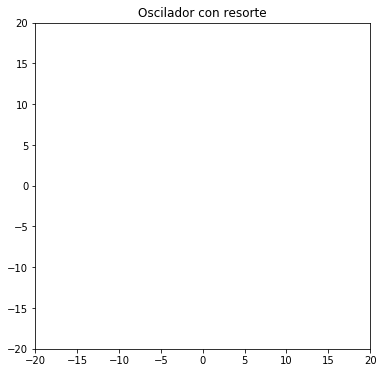

In [69]:
#Animando
x = solucion[:,0]*np.cos(solucion[:,1])
y = solucion[:,0]*np.cos(solucion[:,1])

def ReduceTime(t,factor):
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

t = np.linspace(0,30,N)
redT = ReduceTime(t,20)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_title("Oscilador con resorte")

def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x[i],y[i])
    
    return plot

Animation = anim.FuncAnimation(fig,Update)